In [4]:
%pip install ultralytics scikit-learn

  Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl (8.9 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- -

In [2]:
import os
import cv2
import glob
import yaml
import shutil
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

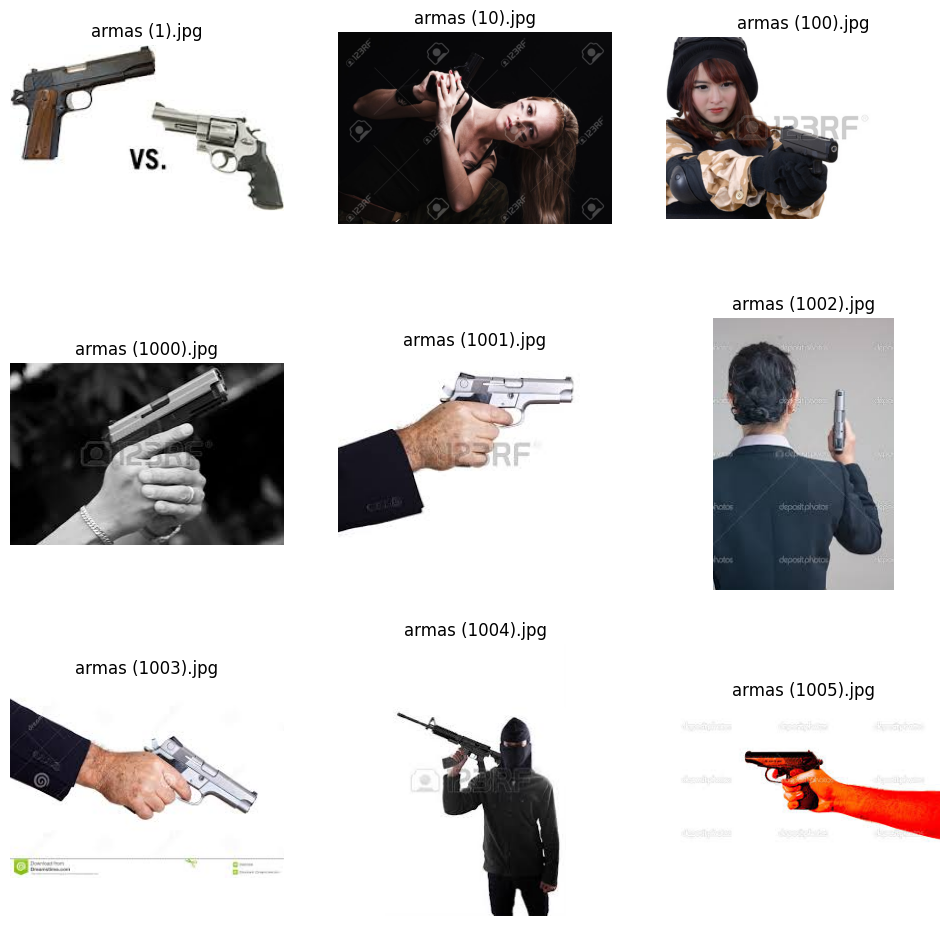

In [5]:
# Paths for the new dataset
images_folder_new = 'dataset/images'  
labels_folder_new = 'dataset/labels'  

# Display Sample Images from the New Dataset

def show_sample_images(images_folder, num_images=9):
    images = os.listdir(images_folder)[:num_images]  
    
    plt.figure(figsize=(12, 12))  # Set the figure size
    for i, img_file in enumerate(images):
        img_path = os.path.join(images_folder, img_file) 
        img = cv2.imread(img_path)  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        
        plt.subplot(3, 3, i + 1)  # Create a subplot for each image
        plt.imshow(img)  # Display the image
        plt.title(img_file)  # Set the title as the image file name
        plt.axis('off')  # Hide axis ticks

    plt.show()

# Display the first 9 images from the new training dataset
show_sample_images(images_folder_new, num_images=9)


In [7]:
image_dir = 'dataset/images'
label_dir = 'dataset/labels'

os.makedirs('dataset/working/images/train', exist_ok=True)
os.makedirs('dataset/working/images/val', exist_ok=True)
os.makedirs('dataset/working/labels/train', exist_ok=True)
os.makedirs('dataset/working/labels/val', exist_ok=True)

image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

for file in train_files:

    shutil.copy(os.path.join(image_dir, file), 'dataset/working/images/train/')

    label_file = file.replace('.jpg', '.txt')
    shutil.copy(os.path.join(label_dir, label_file), 'dataset/working/labels/train/')

    
for file in val_files:
  
    shutil.copy(os.path.join(image_dir, file), 'dataset/working/images/val/')

    label_file = file.replace('.jpg', '.txt')
    shutil.copy(os.path.join(label_dir, label_file), 'dataset/working/labels/val/')

print("Data has been split into train and val.")


Data has been split into train and val.


In [8]:
# Define the content of the YAML file
dataset_config = {
    'path': 'dataset/working',  
    'names': {0: 'gun'}, 
    'train': 'images/train',  
    'val': 'images/val'  
}

with open('data.yaml', 'w') as file:
    yaml.dump(dataset_config, file, default_flow_style=False)

print("data.yaml file has been created.")


data.yaml file has been created.


In [ ]:
model = YOLO('yolov10b.pt')

model.train(data='data.yaml', epochs=30, imgsz=640)



100%|██████████| 39.7M/39.7M [00:00<00:00, 66.9MB/s]
Ultralytics 8.3.4 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov10b.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

In [1]:
results = {'metrics/precision(B)': 0.8822963608871267, 'metrics/recall(B)': 0.7861302388628829, 'metrics/mAP50(B)': 0.8813350366968226, 'metrics/mAP50-95(B)': 0.7144728521346412, 'fitness': 0.7311590705908593}
for key, value in results.items():
    print(f"{key}: {value}")

metrics/precision(B): 0.8822963608871267
metrics/recall(B): 0.7861302388628829
metrics/mAP50(B): 0.8813350366968226
metrics/mAP50-95(B): 0.7144728521346412
fitness: 0.7311590705908593



0: 640x640 1 gun, 16.3ms
1: 640x640 1 gun, 16.3ms
2: 640x640 1 gun, 16.3ms
3: 640x640 1 gun, 16.3ms
4: 640x640 4 guns, 16.3ms
5: 640x640 1 gun, 16.3ms
6: 640x640 1 gun, 16.3ms
7: 640x640 1 gun, 16.3ms
8: 640x640 1 gun, 16.3ms
Speed: 3.0ms preprocess, 16.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


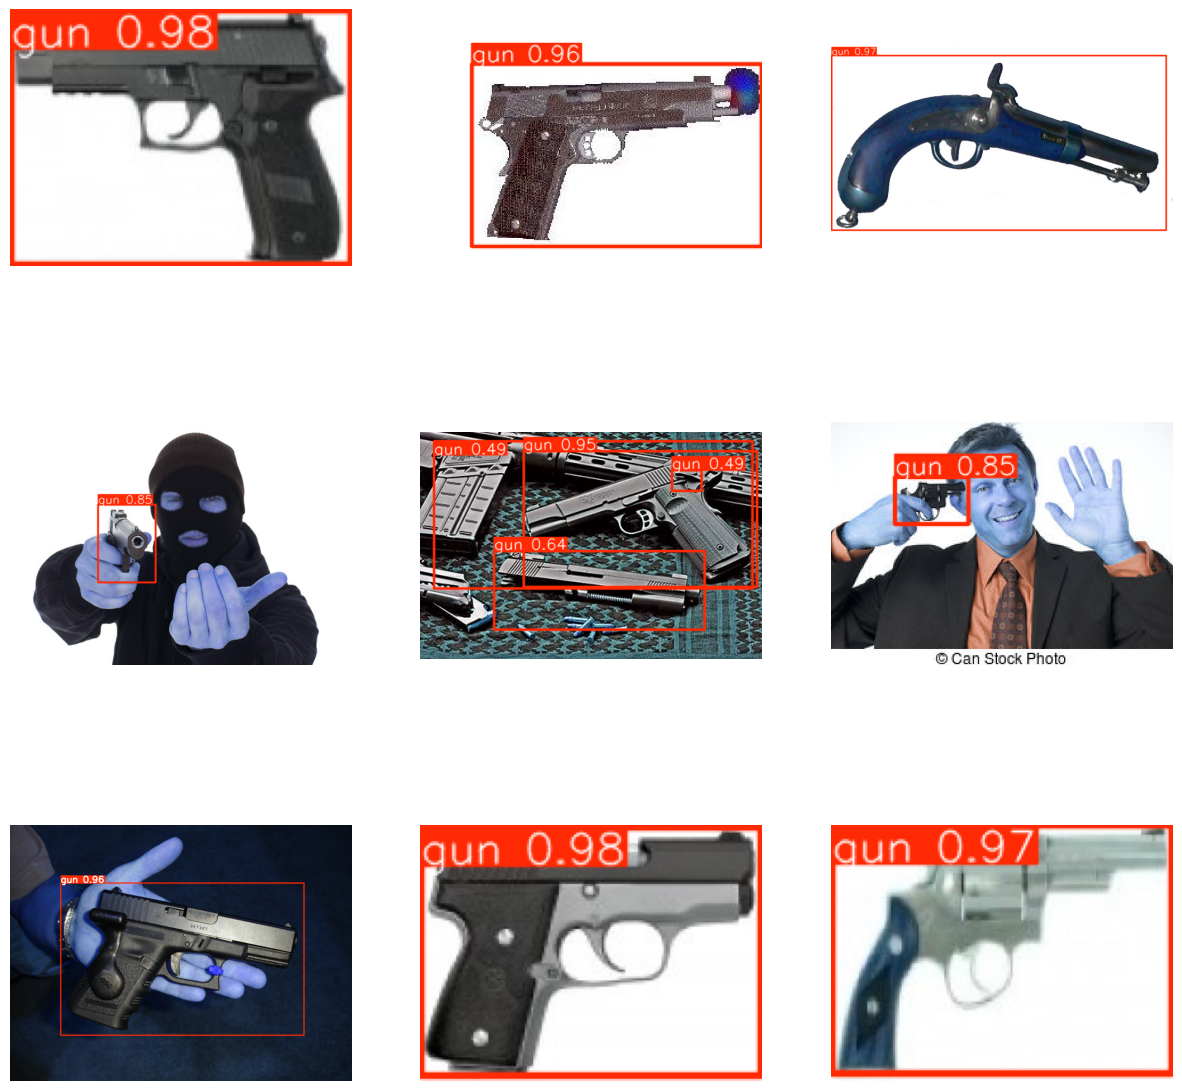

In [ ]:
model = YOLO('runs/detect/train/weights/best.pt')

test_images_dir = 'dataset/working/images/val'
test_images = glob.glob(test_images_dir + '/*.jpg')

random_images = random.sample(test_images, 9)

results = model(random_images, imgsz=640)

plt.figure(figsize=(15, 15))

for i, result in enumerate(results[:9]):
    
    img = cv2.imread(random_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    
    annotated_img = result.plot()  
    
    plt.subplot(3, 3, i+1)
    plt.imshow(annotated_img)
    plt.axis('off')

plt.show()


In [ ]:
model.save('gun.pt')